In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import heat_transfer_coefficient as htc
import reference_natural_convection as rnc

# 対流熱伝達率の検証（無風）

In [2]:
# 温度条件
theta_1 = 20.0
theta_2 = np.arange(1, 21) * 1.0
print(theta_2)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


In [3]:
# 通気層高さ、厚さは固定
l_h = 3.0
l_d = 0.03

In [4]:
# 垂直の場合
# 最新建築環境工学第4版
takeda_method_v = rnc.calc_takeda_method(
    delta_t=abs(theta_1 - (theta_1 + theta_2) / 2.0),
    direction="v")

# 空調便覧第14版
shase_handbook_v_out = [rnc.calc_shase_handbook_method(
    tw=theta_1,
    tf=(theta_1 + theta_array) / 2.0, d=l_h, direction="v")
                        for theta_array in theta_2]
shase_handbook_v_in = [rnc.calc_shase_handbook_method(
    tw=theta_array,
    tf=(theta_1 + theta_array) / 2.0, d=l_h, direction="v")
                       for theta_array in theta_2]

# 建築設備基礎
kimura_v_out = [rnc.calc_kimura_method(
    tw=theta_1,
    tf=(theta_1 + theta_array) / 2.0, d=l_h, direction="v")
                for theta_array in theta_2]
kimura_v_in = [rnc.calc_kimura_method(
    tw=theta_array,
    tf=(theta_1 + theta_array) / 2.0, d=l_h, direction="v")
                for theta_array in theta_2]

# ASHRAE Handbook Fundamentals 2013
ashrae_handbook_v_out = [rnc.calc_ashrae_handbook_method(
    tw=theta_1,
    tf=(theta_1 + theta_array) / 2.0, L=l_h, direction="v")
                for theta_array in theta_2]
ashrae_handbook_v_in = [rnc.calc_ashrae_handbook_method(
    tw=theta_array,
    tf=(theta_1 + theta_array) / 2.0, L=l_h, direction="v")
                for theta_array in theta_2]

# 機械学会　伝熱工学資料改訂第5版
jsme_databook_v = rnc.calc_jsme_databook(
    tw=(theta_1 + theta_2) / 2.0,
    tf=(theta_1 + theta_2) / 2.0,
    L=l_h, b=l_d)

# 赤坂の方法
akasaka_v = [htc.convective_heat_transfer_coefficient(
    v_a=0.0, theta_1=theta_1, theta_2=theta_array, angle=90.0, l_h=l_h, l_d=l_d)
             for theta_array in theta_2]

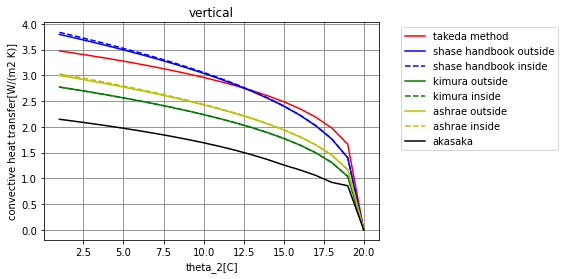

In [5]:
# グラフの描画
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('theta_2[C]')
ax1.set_ylabel('convective heat transfer[W/(m2 K)]')

plt.grid(which='major',color='gray',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='-')

plt.plot(theta_2,takeda_method_v,linestyle='solid',color='r',
         label='takeda method')
plt.plot(theta_2,shase_handbook_v_out,linestyle='solid',color='b',
         label='shase handbook outside')
plt.plot(theta_2,shase_handbook_v_in,linestyle='dashed',color='b',
         label='shase handbook inside')
plt.plot(theta_2,kimura_v_out,linestyle='solid',color='g',
         label='kimura outside')
plt.plot(theta_2,kimura_v_in,linestyle='dashed',color='g',
         label='kimura inside')
plt.plot(theta_2,ashrae_handbook_v_out,linestyle='solid',color='y',
         label='ashrae outside')
plt.plot(theta_2,ashrae_handbook_v_in,linestyle='dashed',color='y',
         label='ashrae inside')
plt.plot(theta_2,akasaka_v,linestyle='solid',color='k',
         label='akasaka')

plt.title('vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()